In [2]:
import numpy as np
import pandas as pd
import seaborn  as sb

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn import metrics # for score / accuracy

## Procesamiento de los datos

In [3]:
df = pd.read_csv('DATA/data.csv')
print("Tamaño del conjunto de datos {}".format(df.shape))

df.head()

Tamaño del conjunto de datos (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Información de los atributos

1) ID number

2) Diagnosis (M = malignant, B = benign) 

3) ... 32) Se calculan diez características de valor real para cada núcleo celular:

VALOR | INFORMACIÓN                                                                                           |
------|-------------------------------------------------------------------------------------------------------|
a)    |radio (media de las distancias desde el centro a los puntos del perímetro)                             | 
b)    |textura (desviación estándar de los valores de la escala de grises)                                    |
c)    |perímetro d) área e) suavidad (variación local en las longitudes de radio)                             |
f)    |compacidad (perímetro ^ 2 / área - 1.0) g) concavidad (gravedad de las porciones cóncavas del contorno)|
h)    |puntos cóncavos (número de porciones cóncavas del contorno)                                            | 
i)    |simetría                                                                                               |
j)    |dimensión fractal ("aproximación de la costa" - 1)                                                     |

La media, el error estándar y el "peor" o mayor (media de los tres valores más grandes) de estas características se calcularon para cada imagen, lo que resultó en 30 características. Por ejemplo, el campo 3 es Radio medio, el campo 13 es Radio SE, el campo 23 es Peor radio.

Todos los valores de características se recodifican con cuatro dígitos significativos.

REFERENCIAS
* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
* https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [4]:
# Seleccionar las caracteristicas a utilizar
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst','concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

/home/jorge/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


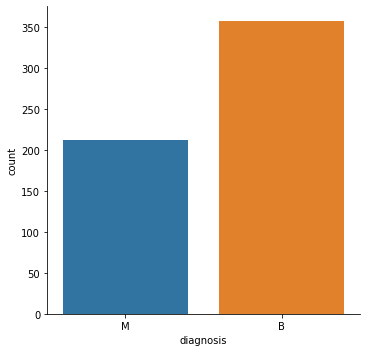

In [5]:
"""
    ETIQUETAS
    
    M = maligno
    B = benigno
"""

sb.factorplot('diagnosis',data=df,kind="count")

y = df['diagnosis']

In [6]:
# Separacion de datos de entrenamiento y prueba en 70% y 30% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

## Árbol de Decisión


REFERENCIAS: 
* https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052
* https://towardsdatascience.com/what-is-a-decision-tree-22975f00f3e1
* https://scikit-learn.org/stable/modules/tree.html#classification

In [16]:
heuristic = "entropy"
decision_tree = tree.DecisionTreeClassifier(criterion = heuristic)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
print("Decision Trees's Accuracy using entropy: ", metrics.accuracy_score(y_test, predTree))
print("Depth of Decision Tree: ", decision_tree.tree_.max_depth)

Decision Trees's Accuracy using entropy:  0.935672514619883
Depth of Decision Tree:  5


ModuleNotFoundError: No module named 'graphviz'